<a href="https://colab.research.google.com/github/2303A51469/GENERATIVE-AI_2025/blob/main/2303A52431_WEEK_4_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Question 1**

Design a simple ANN architecture with one input and one output layer (no hidden layer). Assume a linear activation function in the output layer. • Write Python code for a backpropagation algorithm with gradient descent optimization to update weights and bias parameters of the ANN model with training data shown in Table 1. • Calculate the mean square error with training and testing data shown in Table 2. • Write Python code that reads the input data [x1, x2, and x3] from the user. Predict the output with deployed ANN model

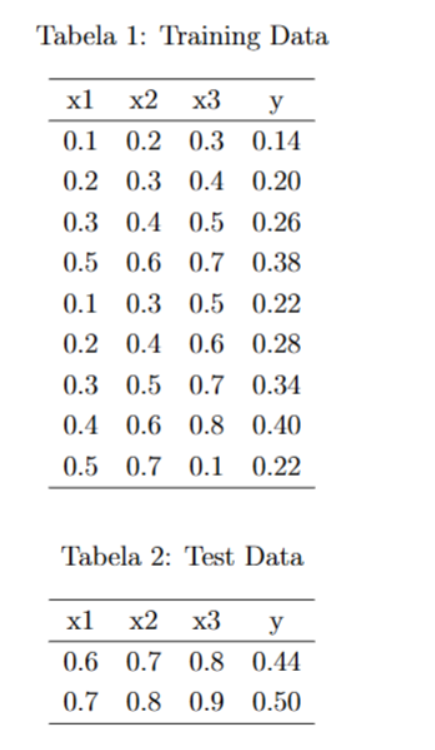

In [1]:
import numpy as np
X_train = np.array([
    [0.1, 0.2, 0.3],
    [0.2, 0.3, 0.4],
    [0.3, 0.4, 0.5],
    [0.5, 0.6, 0.7],
    [0.1, 0.3, 0.5],
    [0.2, 0.4, 0.6],
    [0.3, 0.5, 0.7],
    [0.4, 0.6, 0.8],
    [0.5, 0.7, 0.1]
])
y_train = np.array([0.14, 0.20, 0.26, 0.38, 0.22, 0.28, 0.34, 0.40, 0.22])

X_test = np.array([
    [0.6, 0.7, 0.8],
    [0.7, 0.8, 0.9]
])
y_test = np.array([0.44, 0.50])

weights = np.random.rand(3)
bias = np.random.rand()

learning_rate = 0.1
epochs = 1000
for epoch in range(epochs):
    y_pred = np.dot(X_train, weights) + bias

    error = y_pred - y_train
    mse = np.mean(error**2)

    d_weights = (2 / len(X_train)) * np.dot(X_train.T, error)
    d_bias = (2 / len(X_train)) * np.sum(error)

    weights -= learning_rate * d_weights
    bias -= learning_rate * d_bias

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, MSE: {mse}")

y_train_pred = np.dot(X_train, weights) + bias
mse_train = np.mean((y_train_pred - y_train)**2)
print(f"Training MSE: {mse_train}")

y_test_pred = np.dot(X_test, weights) + bias
mse_test = np.mean((y_test_pred - y_test)**2)
print(f"Testing MSE: {mse_test}")
def predict_user_input():
    x1 = float(input("Enter x1: "))
    x2 = float(input("Enter x2: "))
    x3 = float(input("Enter x3: "))
    user_input = np.array([x1, x2, x3])
    prediction = np.dot(user_input, weights) + bias
    print(f"Predicted output: {prediction}")

predict_user_input()

Epoch 0, MSE: 1.3093810857646164
Epoch 100, MSE: 0.0029570474403206658
Epoch 200, MSE: 0.0008835578873484946
Epoch 300, MSE: 0.00034334738423976287
Epoch 400, MSE: 0.00019761776594265896
Epoch 500, MSE: 0.00015457642353105888
Epoch 600, MSE: 0.00013866133771868366
Epoch 700, MSE: 0.00013011301998941754
Epoch 800, MSE: 0.00012371486353977541
Epoch 900, MSE: 0.00011807363541660698
Training MSE: 0.0001128091742111558
Testing MSE: 0.0004283906620577327
Enter x1: 0.6
Enter x2: 0.7
Enter x3: 0.8
Predicted output: 0.4594235297617264


# **Question 2**

Design a simple ANN architecture with one input and one output layer (no hidden layer). Assume a sigmoid activation function shown in the equation 1 in the output layer. f (x) = 1 1 + e−x (1) • Write Python code for a backpropagation algorithm with gradient descent optimization to update weights and bias parameters of the ANN model with training data shown in

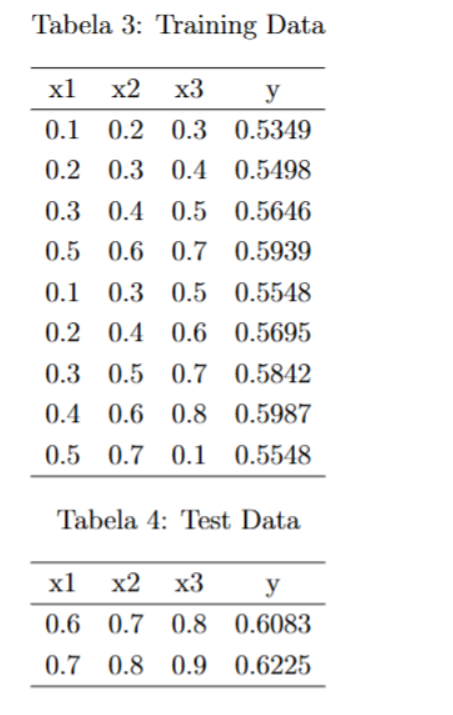

• Calculate the mean square error with training and testing data shown in Table • Write Python code that reads the input data [x1, x2, and x3] from the user. Predict the output with deployed ANN model

In [2]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
def initialize_parameters(input_size):
    weights = np.random.rand(input_size)
    bias = np.random.rand()
    return weights, bias
def forward_propagation(X, weights, bias):
    weighted_sum = np.dot(X, weights) + bias
    output = sigmoid(weighted_sum)
    return output
def backpropagation(X, y, output, weights, bias, learning_rate):
    error = y - output
    d_output = error * sigmoid_derivative(output)
    d_weights = np.dot(X.T, d_output)
    d_bias = np.sum(d_output)
    weights += learning_rate * d_weights
    bias += learning_rate * d_bias
    return weights, bias
def mean_square_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
def train_model(X_train, y_train, weights, bias, learning_rate, epochs):
    for epoch in range(epochs):
        for i in range(len(X_train)):
            output = forward_propagation(X_train[i], weights, bias)
            weights, bias = backpropagation(X_train[i], y_train[i], output, weights, bias, learning_rate)
        if epoch % 1000 == 0:
            loss = mean_square_error(y_train, [forward_propagation(x, weights, bias) for x in X_train])
            print(f"Epoch {epoch}, Loss: {loss}")
    return weights, bias
def predict(X, weights, bias):
    return forward_propagation(X, weights, bias)
X_train = np.array([
    [0.1, 0.2, 0.3],
    [0.2, 0.3, 0.4],
    [0.3, 0.4, 0.5],
    [0.5, 0.6, 0.7],
    [0.1, 0.3, 0.5],
    [0.2, 0.4, 0.6],
    [0.3, 0.5, 0.7],
    [0.4, 0.6, 0.8],
    [0.5, 0.7, 0.1]
])
y_train = np.array([0.5349, 0.5498, 0.5646, 0.5939, 0.5548, 0.5695, 0.5842, 0.5987, 0.5548])

X_test = np.array([
    [0.6, 0.7, 0.8],
    [0.7, 0.8, 0.9]
])

y_test = np.array([0.6083, 0.6225])

input_size = X_train.shape[1]
weights, bias = initialize_parameters(input_size)

learning_rate = 0.1
epochs = 10000

weights, bias = train_model(X_train, y_train, weights, bias, learning_rate, epochs)

y_train_pred = np.array([predict(x, weights, bias) for x in X_train])
train_mse = mean_square_error(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")

y_test_pred = np.array([predict(x, weights, bias) for x in X_test])
test_mse = mean_square_error(y_test, y_test_pred)
print(f"Testing MSE: {test_mse}")

user_input = np.array([float(input(f"Enter x{i+1}: ")) for i in range(input_size)])
predicted_output = predict(user_input, weights, bias)
print(f"Predicted Output: {predicted_output}")

Epoch 0, Loss: 0.0201675440548461
Epoch 1000, Loss: 1.360802282031899e-05
Epoch 2000, Loss: 1.0137951874428857e-06
Epoch 3000, Loss: 6.564489976814773e-07
Epoch 4000, Loss: 5.750735779956296e-07
Epoch 5000, Loss: 5.087275177740181e-07
Epoch 6000, Loss: 4.501673620907957e-07
Epoch 7000, Loss: 3.98356303414215e-07
Epoch 8000, Loss: 3.5251425278175274e-07
Epoch 9000, Loss: 3.119536604314747e-07
Training MSE: 2.760997649723039e-07
Testing MSE: 1.0287201348360014e-06
Enter x1: 0.6
Enter x2: 0.7
Enter x3: 0.8
Predicted Output: 0.6073330529459436
